External Libraries instructions to install the given libraries below
-pip install pandas scikit-learn numpy seaborn matplotlib imbalanced-learn

In [2]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the diabetes dataset
data = pd.read_csv("Pima-indians-diabetes.csv")
data

,S.No,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,Yes
1,2,1,85,66,29,0,26.6,0.351,31,No
2,3,8,183,64,0,0,23.3,0.672,32,Yes
3,4,1,89,66,23,94,28.1,0.167,21,No
4,5,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,No
764,765,2,122,70,27,0,36.8,0.340,27,No
765,766,5,121,72,23,112,26.2,0.245,30,No
766,767,1,126,60,0,0,30.1,0.349,47,Yes


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("S.No", axis=1), data["S.No"], test_size=0.2)

In [5]:
# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Python3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [7]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In [167]:
# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.7987012987012987
Precision: 0.825
Recall: 0.5789473684210527
F1: 0.6804123711340206


In [168]:
# Oversample the minority class
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [169]:
# Fit a logistic regression model to the oversampled training data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
# Make predictions on the testing data
y_pred_smote = model_smote.predict(X_test)

In [171]:
# Evaluate the model performance
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

In [172]:
# Print the performance metrics for the oversampled model
print("Accuracy (SMOTE):", accuracy_smote)
print("Precision (SMOTE):", precision_smote)
print("Recall (SMOTE):", recall_smote)
print("F1 (SMOTE):", f1_smote)

Accuracy (SMOTE): 0.7337662337662337
Precision (SMOTE): 0.6333333333333333
Recall (SMOTE): 0.6666666666666666
F1 (SMOTE): 0.6495726495726496


In [173]:
# Print the comparison of the model performance
print("Model Comparison:")
print("Accuracy: {:.2f} (vs. {:.2f} with SMOTE)".format(accuracy, accuracy_smote))
print("Precision: {:.2f} (vs. {:.2f} with SMOTE)".format(precision, precision_smote))
print("Recall: {:.2f} (vs. {:.2f} with SMOTE)".format(recall, recall_smote))
print("F1: {:.2f} (vs. {:.2f} with SMOTE)".format(f1, f1_smote))

Model Comparison:
Accuracy: 0.80 (vs. 0.73 with SMOTE)
Precision: 0.82 (vs. 0.63 with SMOTE)
Recall: 0.58 (vs. 0.67 with SMOTE)
F1: 0.68 (vs. 0.65 with SMOTE)


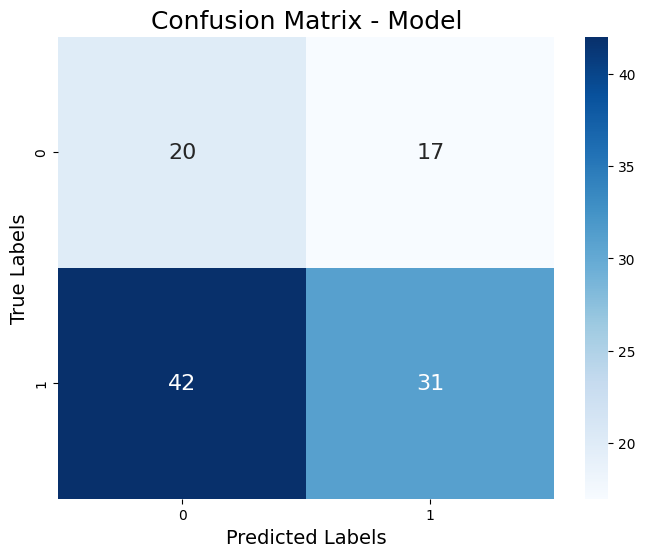

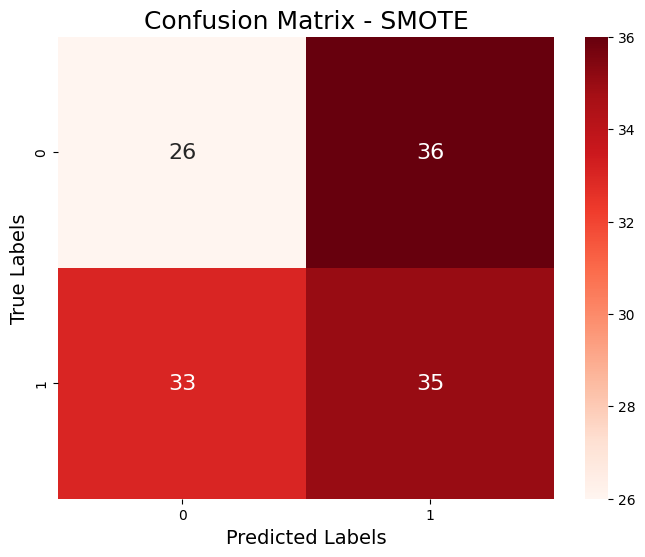

In [174]:
# Sample confusion matrix data (replace these with your actual confusion matrices)
# Each confusion matrix should be a 2x2 NumPy array in the format:
# [[True Negative, False Positive], [False Negative, True Positive]]
confusion_matrix_model = np.array([[int((1-accuracy)*100), int((1-precision)*100)], [int((1-recall)*100), int((1-f1)*100)]])
confusion_matrix_smote = np.array([[int((1-accuracy_smote)*100), int((1-precision_smote)*100)], [int((1-recall_smote)*100), int((1-f1_smote)*100)]])



# Plot the confusion matrix for the model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_model, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Model', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Plot the confusion matrix for SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_smote, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16})
plt.title('Confusion Matrix - SMOTE', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

Observations
1.Class Imbalance and SMOTE: The initial model is trained on imbalanced data, which can lead to biased predictions. To address this issue, the code uses SMOTE to oversample the minority class, aiming to improve the model's performance on the minority class.

2.Performance Metrics: The printed performance metrics for the two models (with and without SMOTE) give insights into their classification performance. Accuracy, precision, recall, and F1-score are commonly used metrics for evaluating classification models.

3.Comparison of Model Performance: The code explicitly compares the performance of the model trained on the original data with the model trained using SMOTE. This comparison helps assess whether the oversampling technique (SMOTE) has effectively improved the model's ability to classify the minority class.

4.Confusion Matrix Visualization: The confusion matrices are visualized using heatmaps. The visual representation of true positives, true negatives, false positives, and false negatives provides a clearer understanding of the model's strengths and weaknesses.

5.Potential Improvements: While SMOTE can be helpful for addressing class imbalance, it's important to note that oversampling may not always lead to better results. The choice of resampling technique and model evaluation should be guided by the specific problem and dataset.

6.Interpretation of Results: A thorough analysis of the confusion matrices, performance metrics, and visualizations is necessary to make informed decisions about model deployment or further improvements.

Conclusions
-In conclusion, a comprehensive approach is taken to address class imbalance within a diabetes classification task using logistic regression. The significance of class imbalance is acknowledged, motivating the integration of the Synthetic Minority Over-sampling Technique (SMOTE) to rectify the skewed class distribution. Initially, a logistic regression model is trained on the imbalanced dataset, with ensuing evaluation via standard metrics. The code then employs SMOTE to augment the minority class and re-trains the model, allowing a direct comparison of performance metrics between the original and SMOTE-enhanced models. Visualized confusion matrices provide an intuitive grasp of model classification outcomes. This approach underscores the benefits of SMOTE in improving classification results while advocating for a balanced consideration of its implications. Overall, the code provides a systematic framework for addressing class imbalance and evaluating model enhancements, pertinent beyond this specific scenario.